In [1]:
# Imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Ler o arquivo CSV
csv_name = 'Ecommerce_DBS.csv'
df_csv = pd.read_csv(csv_name)
# Exibir informações do DataFrame
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [3]:
# 0-Limpar os dados
desired_columns = ['Customer ID','Purchase Date','Product Category','Product Price', 'Quantity', 'NPS', 'Customer Age ', 'Gender', 'Source']
df_filtered = df_csv[desired_columns].copy()  # Certifique-se de fazer uma cópia do DataFrame original

# Convertendo 'Purchase Date' para o formato de data
df_filtered.loc[:, 'Purchase Date'] = pd.to_datetime(df_filtered['Purchase Date'], format='%d/%m/%Y')

# Arrumando nome das colunas
df_filtered.rename(columns={'Customer Age ': 'Customer Age'}, inplace=True)

df_filtered['Source'] = df_filtered['Source'].replace({'Instagram Campign': 'Instagram Campaign', 'FaceBook campaign': 'FaceBook Campaign'})
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Customer ID       250000 non-null  int64 
 1   Purchase Date     250000 non-null  object
 2   Product Category  250000 non-null  object
 3   Product Price     250000 non-null  int64 
 4   Quantity          250000 non-null  int64 
 5   NPS               250000 non-null  int64 
 6   Customer Age      250000 non-null  int64 
 7   Gender            250000 non-null  object
 8   Source            250000 non-null  object
dtypes: int64(5), object(4)
memory usage: 17.2+ MB
None


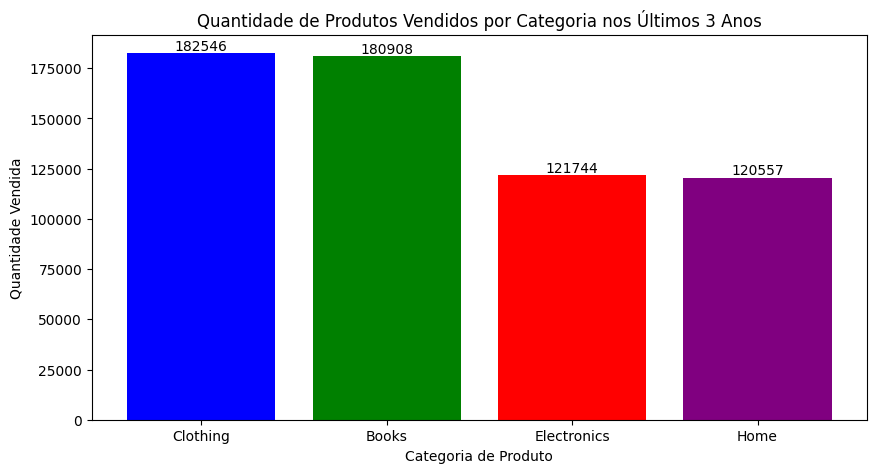

In [4]:
# 2-Quais os produtos mais vendidos considerando os últimos 3 anos?
df_3_years = df_filtered[df_filtered['Purchase Date'] > df_filtered['Purchase Date'].max() - pd.DateOffset(years=3)]
df_3_years = df_3_years.groupby('Product Category')['Quantity'].sum().reset_index()
df_3_years = df_3_years.sort_values(by='Quantity', ascending=False)

# Extraindo categorias e quantidades
categories = df_3_years['Product Category']
quantities = df_3_years['Quantity']

# Criando o gráfico de colunas
plt.figure(figsize=(10, 5))
plt.bar(categories, quantities, color=['blue', 'green', 'red', 'purple'])

# Adicionando título e rótulos
plt.title('Quantidade de Produtos Vendidos por Categoria nos Últimos 3 Anos')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Vendida')

# Adicionando valores acima das colunas
for i, v in enumerate(quantities):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

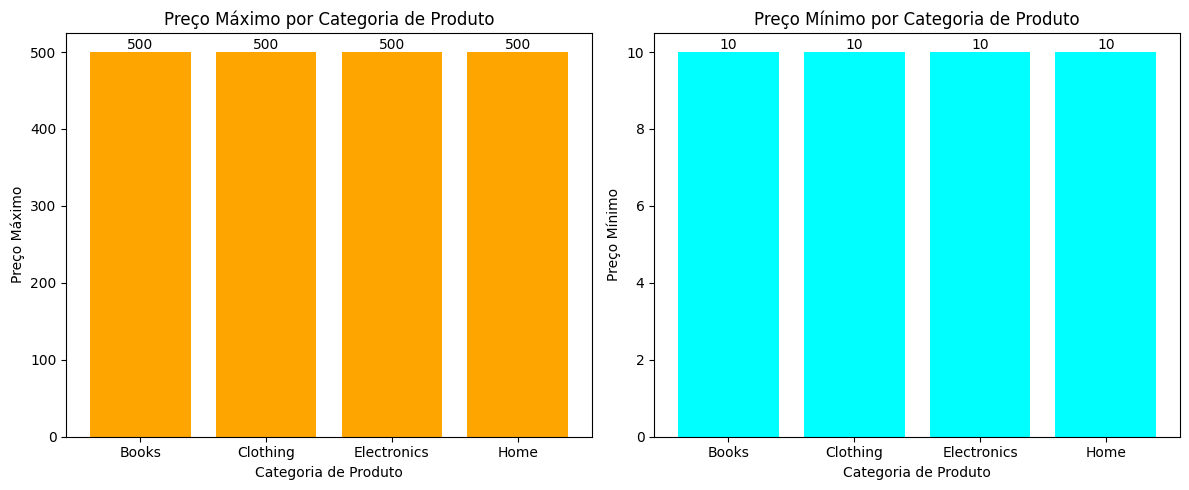

In [5]:
#3-Qual o produto mais cara e o mais barato?
df_max_price = df_filtered.groupby('Product Category')['Product Price'].max().reset_index()
df_min_price = df_filtered.groupby('Product Category')['Product Price'].min().reset_index()

# Extraindo categorias e preços máximos e mínimos
categories = df_max_price['Product Category']
max_prices = df_max_price['Product Price']
min_prices = df_min_price['Product Price']

# Criando gráficos de colunas
# Preço Máximo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(categories, max_prices, color='orange')
plt.title('Preço Máximo por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Preço Máximo')
for i, v in enumerate(max_prices):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Preço Mínimo
plt.subplot(1, 2, 2)
plt.bar(categories, min_prices, color='cyan')
plt.title('Preço Mínimo por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Preço Mínimo')
for i, v in enumerate(min_prices):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Ajustando layout e exibindo gráficos
plt.tight_layout()
plt.show()

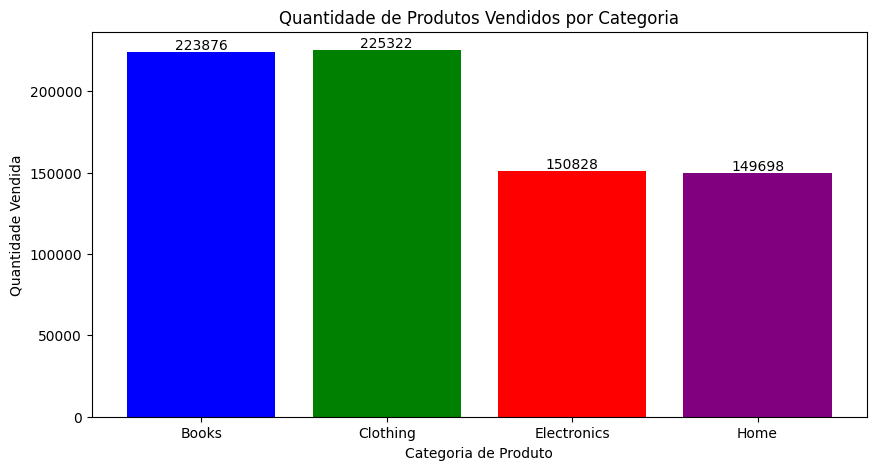

In [6]:
#4-Qual a categoria mais vendida e menos vendida?
df_best_sellers = df_filtered.groupby('Product Category')['Quantity'].sum().reset_index()

# Extraindo categorias e quantidades
categories = df_best_sellers['Product Category']
quantities = df_best_sellers['Quantity']

# Criando o gráfico de colunas
plt.figure(figsize=(10, 5))
plt.bar(categories, quantities, color=['blue', 'green', 'red', 'purple'])

# Adicionando título e rótulos
plt.title('Quantidade de Produtos Vendidos por Categoria')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Vendida')

# Adicionando valores acima das colunas
for i, v in enumerate(quantities):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

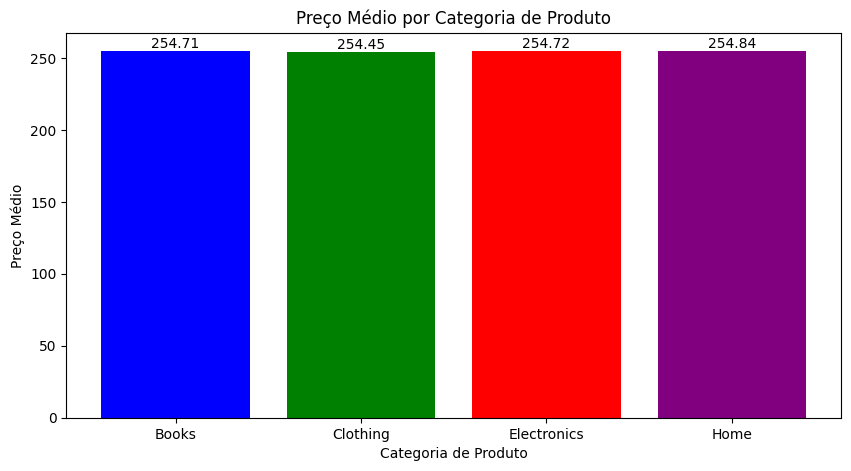

In [7]:
#5-Qual a categoria mais cara e menos cara?
df_mean_price = df_filtered.groupby('Product Category')['Product Price'].mean().reset_index()

# Extraindo categorias e preços médios
categories = df_mean_price['Product Category']
mean_prices = df_mean_price['Product Price']

# Criando o gráfico de colunas
plt.figure(figsize=(10, 5))
plt.bar(categories, mean_prices, color=['blue', 'green', 'red', 'purple'])

# Adicionando título e rótulos
plt.title('Preço Médio por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Preço Médio')

# Adicionando valores acima das colunas
for i, v in enumerate(mean_prices):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

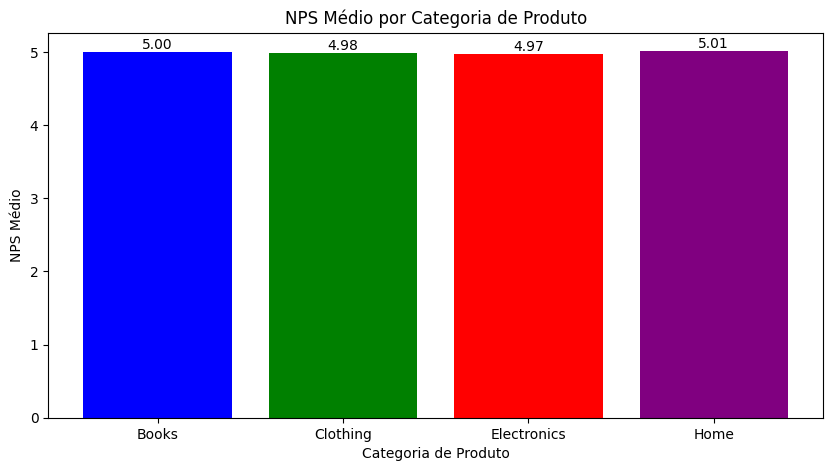

In [8]:
#6-Qual o produto com melhor e pior NPS?
df_mean_nps = df_filtered.groupby('Product Category')['NPS'].mean().reset_index()

# Extraindo categorias e NPS médios
categories = df_mean_nps['Product Category']
mean_nps = df_mean_nps['NPS']

# Criando o gráfico de colunas
plt.figure(figsize=(10, 5))
plt.bar(categories, mean_nps, color=['blue', 'green', 'red', 'purple'])

# Adicionando título e rótulos
plt.title('NPS Médio por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('NPS Médio')

# Adicionando valores acima das colunas
for i, v in enumerate(mean_nps):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

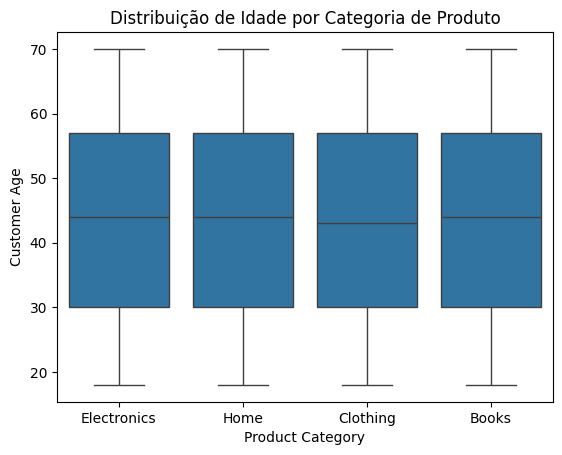

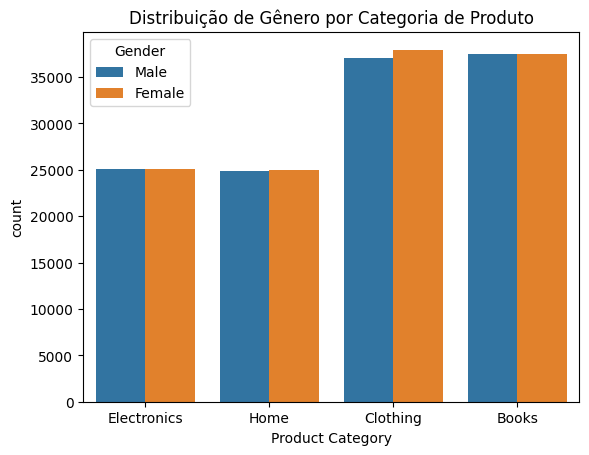

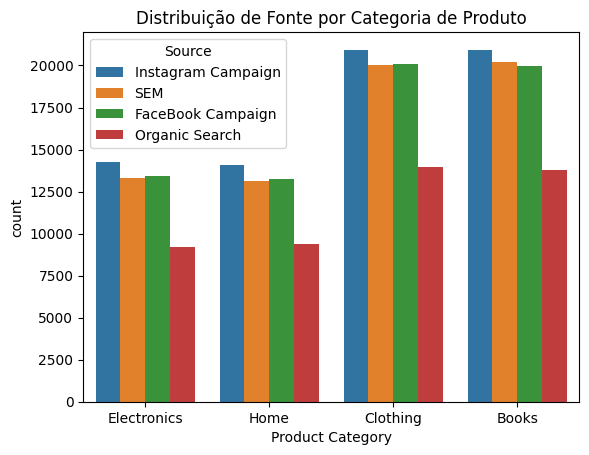

In [9]:
# Distribuição de idade por categoria de produto
sns.boxplot(x='Product Category', y='Customer Age', data=df_filtered)
plt.title('Distribuição de Idade por Categoria de Produto')
plt.show()

# Distribuição de gênero por categoria de produto
sns.countplot(x='Product Category', hue='Gender', data=df_filtered)
plt.title('Distribuição de Gênero por Categoria de Produto')
plt.show()

# Distribuição de fonte por categoria de produto
sns.countplot(x='Product Category', hue='Source', data=df_filtered)
plt.title('Distribuição de Fonte por Categoria de Produto')
plt.show()

In [10]:
# Criação de variáveis dummy
df_dummies = pd.get_dummies(df_filtered, columns=['Product Category', 'Gender', 'Source'])

# Excluindo colunas não necessárias para regressão
df_dummies = df_dummies.drop(columns=['Purchase Date', 'Customer ID', 'Product Price', 'Quantity', 'NPS'])
df_dummies = df_dummies.astype(int)
df_dummies

,Customer Age,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Gender_Female,Gender_Male,Source_FaceBook Campaign,Source_Instagram Campaign,Source_Organic Search,Source_SEM
0,20,0,0,1,0,0,1,0,1,0,0
1,20,0,0,0,1,0,1,0,1,0,0
2,20,0,0,0,1,0,1,0,0,0,1
3,20,0,1,0,0,0,1,0,1,0,0
4,20,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
249995,55,0,1,0,0,0,1,0,0,0,1
249996,42,0,0,0,1,1,0,0,1,0,0
249997,41,0,0,0,1,0,1,0,1,0,0
249998,34,1,0,0,0,1,0,0,1,0,0


<Axes: >

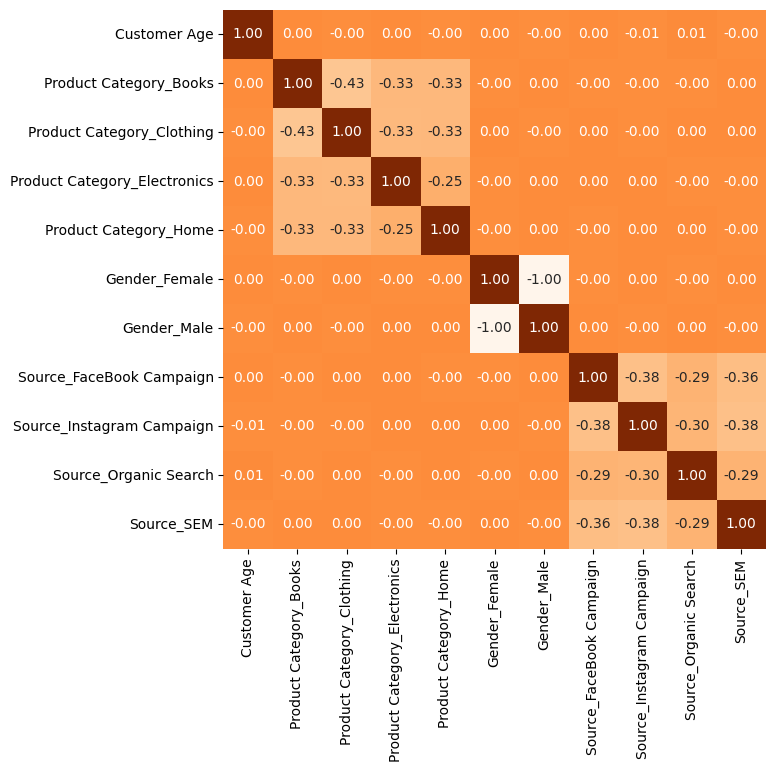

In [11]:
# Mapa de Calor - Correlação
plt.figure(figsize=(7, 7))
corr = np.corrcoef(df_dummies.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Oranges', fmt='.2f', cbar=False, xticklabels=df_dummies.columns, yticklabels=df_dummies.columns)

In [12]:
# Regressão entre Idade e Categoria de Produto
X = df_dummies[['Product Category_Books', 'Product Category_Clothing', 'Product Category_Electronics', 'Product Category_Home']]
y = df_dummies['Customer Age']

# Adicionando constante para o modelo
X = sm.add_constant(X)

# Regressão Linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Customer Age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6967
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.594
Time:                        16:34:37   Log-Likelihood:            -1.0382e+06
No. Observations:              250000   AIC:                         2.076e+06
Df Residuals:                  249995   BIC:                         2.076e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [13]:
# Coeficientes, erros padrão, estatísticas t e valores p
coef = model.params
std_err = model.bse
t_values = model.tvalues
p_values = model.pvalues
conf_int = model.conf_int()

# Criando o dataframe
data = {
    'Coeficiente': coef,
    'Erro Padrão': std_err,
    'Estatística t': t_values,
    'Valor p': p_values,
    'Intervalo de Confiança (2.5%)': conf_int[0],
    'Intervalo de Confiança (97.5%)': conf_int[1]
}
df_summary = pd.DataFrame(data)
df_summary


,Coeficiente,Erro Padrão,Estatística t,Valor p,Intervalo de Confiança (2.5%),Intervalo de Confiança (97.5%)
const,1.231918e+11,1.440285e+11,0.855329,0.39237,-1.591003e+11,4.054839e+11
Product Category_Books,-1.231918e+11,1.440285e+11,-0.855329,0.39237,-4.054839e+11,1.591003e+11
Product Category_Clothing,-1.231918e+11,1.440285e+11,-0.855329,0.39237,-4.054839e+11,1.591003e+11
Product Category_Electronics,-1.231918e+11,1.440285e+11,-0.855329,0.39237,-4.054839e+11,1.591003e+11
Product Category_Home,-1.231918e+11,1.440285e+11,-0.855329,0.39237,-4.054839e+11,1.591003e+11


In [14]:
# Extrair os resultados do teste de significância
results_html = model.summary().tables[1].as_html()

# Converter a tabela HTML em um DataFrame
results_df = pd.read_html(results_html, header=0, index_col=0)[0]

# Extrair os valores p associados aos coeficientes (excluindo o valor p do intercepto)
p_values = results_df.loc[results_df.index != 'const', 'P>|t|']

# Imprimir os valores p associados aos coeficientes
p_values = pd.DataFrame(p_values)
p_values

C:\Users\gerra\AppData\Local\Temp\ipykernel_5160\2155389513.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_df = pd.read_html(results_html, header=0, index_col=0)[0]


,P>|t|
Product Category_Books,0.392
Product Category_Clothing,0.392
Product Category_Electronics,0.392
Product Category_Home,0.392


In [15]:
# Regressão entre Genero e Categoria de Produto
X = df_dummies[['Product Category_Books', 'Product Category_Clothing', 'Product Category_Electronics', 'Product Category_Home']]
y = df_dummies['Gender_Male']

# Adicionando constante para o modelo
X = sm.add_constant(X)

# Regressão Linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Gender_Male   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.201
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.308
Time:                        16:34:37   Log-Likelihood:            -1.8144e+05
No. Observations:              250000   AIC:                         3.629e+05
Df Residuals:                  249995   BIC:                         3.629e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [16]:
# Coeficientes, erros padrão, estatísticas t e valores p
coef = model.params
std_err = model.bse
t_values = model.tvalues
p_values = model.pvalues
conf_int = model.conf_int()

# Criando o dataframe
data = {
    'Coeficiente': coef,
    'Erro Padrão': std_err,
    'Estatística t': t_values,
    'Valor p': p_values,
    'Intervalo de Confiança (2.5%)': conf_int[0],
    'Intervalo de Confiança (97.5%)': conf_int[1]
}
df_summary = pd.DataFrame(data)
df_summary


,Coeficiente,Erro Padrão,Estatística t,Valor p,Intervalo de Confiança (2.5%),Intervalo de Confiança (97.5%)
const,-2.599281e+09,4.678602e+09,-0.555568,0.578507,-1.176922e+10,6.570655e+09
Product Category_Books,2.599281e+09,4.678602e+09,0.555568,0.578507,-6.570655e+09,1.176922e+10
Product Category_Clothing,2.599281e+09,4.678602e+09,0.555568,0.578507,-6.570655e+09,1.176922e+10
Product Category_Electronics,2.599281e+09,4.678602e+09,0.555568,0.578507,-6.570655e+09,1.176922e+10
Product Category_Home,2.599281e+09,4.678602e+09,0.555568,0.578507,-6.570655e+09,1.176922e+10


In [17]:
# Extrair os resultados do teste de significância
results_html = model.summary().tables[1].as_html()

# Converter a tabela HTML em um DataFrame
results_df = pd.read_html(results_html, header=0, index_col=0)[0]

# Extrair os valores p associados aos coeficientes (excluindo o valor p do intercepto)
p_values = results_df.loc[results_df.index != 'const', 'P>|t|']

# Imprimir os valores p associados aos coeficientes
p_values = pd.DataFrame(p_values)
p_values

C:\Users\gerra\AppData\Local\Temp\ipykernel_5160\2155389513.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_df = pd.read_html(results_html, header=0, index_col=0)[0]


,P>|t|
Product Category_Books,0.579
Product Category_Clothing,0.579
Product Category_Electronics,0.579
Product Category_Home,0.579


In [18]:
# Regressão entre Canal e Categoria de Produto
X = df_dummies[['Product Category_Books', 'Product Category_Clothing', 'Product Category_Electronics', 'Product Category_Home']]
y = df_dummies['Source_SEM']

# Adicionando constante para o modelo
X = sm.add_constant(X)

# Regressão Linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Source_SEM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.433
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.220
Time:                        16:34:38   Log-Likelihood:            -1.5083e+05
No. Observations:              250000   AIC:                         3.017e+05
Df Residuals:                  249995   BIC:                         3.017e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [19]:
# Coeficientes, erros padrão, estatísticas t e valores p
coef = model.params
std_err = model.bse
t_values = model.tvalues
p_values = model.pvalues
conf_int = model.conf_int()

# Criando o dataframe
data = {
    'Coeficiente': coef,
    'Erro Padrão': std_err,
    'Estatística t': t_values,
    'Valor p': p_values,
    'Intervalo de Confiança (2.5%)': conf_int[0],
    'Intervalo de Confiança (97.5%)': conf_int[1]
}
df_summary = pd.DataFrame(data)
df_summary

,Coeficiente,Erro Padrão,Estatística t,Valor p,Intervalo de Confiança (2.5%),Intervalo de Confiança (97.5%)
const,4.458849e+09,4.139451e+09,1.077159,0.28141,-3.654366e+09,1.257206e+10
Product Category_Books,-4.458849e+09,4.139451e+09,-1.077159,0.28141,-1.257206e+10,3.654366e+09
Product Category_Clothing,-4.458849e+09,4.139451e+09,-1.077159,0.28141,-1.257206e+10,3.654366e+09
Product Category_Electronics,-4.458849e+09,4.139451e+09,-1.077159,0.28141,-1.257206e+10,3.654366e+09
Product Category_Home,-4.458849e+09,4.139451e+09,-1.077159,0.28141,-1.257206e+10,3.654366e+09


In [20]:
# Extrair os resultados do teste de significância
results_html = model.summary().tables[1].as_html()

# Converter a tabela HTML em um DataFrame
results_df = pd.read_html(results_html, header=0, index_col=0)[0]

# Extrair os valores p associados aos coeficientes (excluindo o valor p do intercepto)
p_values = results_df.loc[results_df.index != 'const', 'P>|t|']

# Imprimir os valores p associados aos coeficientes
p_values = pd.DataFrame(p_values)
p_values

C:\Users\gerra\AppData\Local\Temp\ipykernel_5160\2155389513.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_df = pd.read_html(results_html, header=0, index_col=0)[0]


,P>|t|
Product Category_Books,0.281
Product Category_Clothing,0.281
Product Category_Electronics,0.281
Product Category_Home,0.281
